In [87]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("data.csv")

In [89]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [91]:
#check missing values
print("Missing values:\n",df.isnull().sum())
#check counts of classes
print("\nClass Balance:\n",df["Bankrupt?"].value_counts())

Missing values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Class Balance:
 0    6599
1     220
Name: Bankrupt?, dtype: int64


In [93]:
#get rid of whitespace in column names
df.columns = [column.replace(' ', '') for column in df.columns]
df.columns[:3]

Index(['Bankrupt?', 'ROA(C)beforeinterestanddepreciationbeforeinterest',
       'ROA(A)beforeinterestand%aftertax'],
      dtype='object')

Explore data

In [7]:
print("Correlation with bankruptcy status:\n",df.corr()["Bankrupt?"].sort_values())

Correlation with bankruptcy status:
 NetIncometoTotalAssets                              -0.315457
ROA(A)beforeinterestand%aftertax                    -0.282941
ROA(B)beforeinterestanddepreciationaftertax         -0.273051
ROA(C)beforeinterestanddepreciationbeforeinterest   -0.260807
Networth/Assets                                     -0.250161
                                                       ...   
Borrowingdependency                                  0.176543
CurrentLiabilitytoAssets                             0.194494
Debtratio%                                           0.250161
Bankrupt?                                            1.000000
NetIncomeFlag                                             NaN
Name: Bankrupt?, Length: 96, dtype: float64


Text(0.5, 1.0, 'Debt ratio % vs Bankruptcy status')

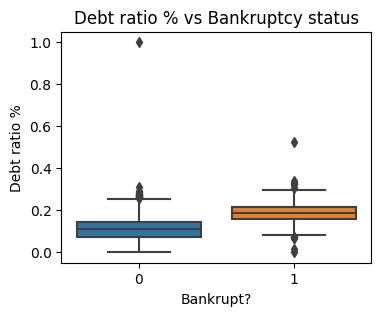

In [8]:
#graph debt ratio % vs bankrupt or not
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x="Bankrupt?", y="Debtratio%")
plt.ylabel("Debt ratio %")
plt.title("Debt ratio % vs Bankruptcy status")

Text(0.5, 1.0, 'Debt ratio % vs Bankruptcy status (25th-75th Percentiles)')

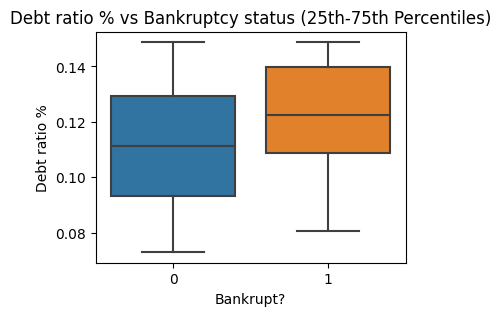

In [9]:
#get 25th and 75th percentiles
q1,q3 = df["Debtratio%"].quantile([0.25,0.75])
#graph net income to total assets vs bankruptcy status between 25th and 75th percentiles
plt.figure(figsize=(4,3))
sns.boxplot(data=df[df["Debtratio%"].between(q1,q3)], x="Bankrupt?", y="Debtratio%")
plt.ylabel("Debt ratio %")
plt.title("Debt ratio % vs Bankruptcy status (25th-75th Percentiles)")

Text(0.5, 1.0, 'Net Income to Total Assets vs Bankruptcy status')

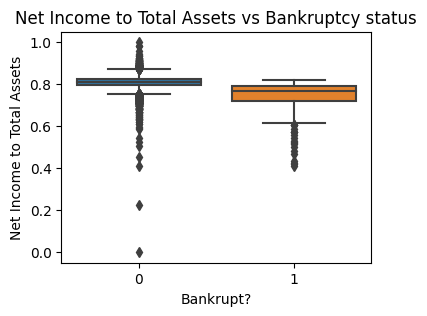

In [10]:
#graph net income to total assets vs bankrupt or not
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x="Bankrupt?", y="NetIncometoTotalAssets")
plt.ylabel("Net Income to Total Assets")
plt.title("Net Income to Total Assets vs Bankruptcy status")

Text(0.5, 1.0, 'Net Income to Total Assets vs Bankruptcy status (25th-75th Percentiles)')

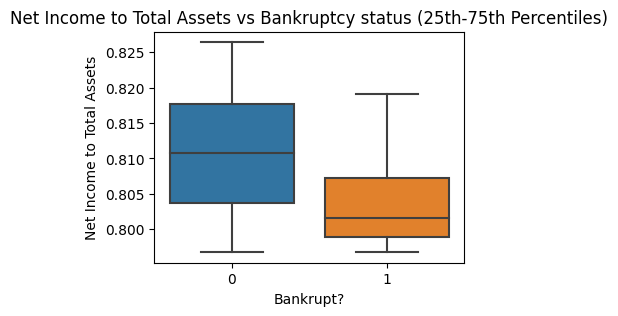

In [11]:
#get 25th and 75th percentiles
q1,q3 = df["NetIncometoTotalAssets"].quantile([0.25,0.75])
#graph net income to total assets vs bankruptcy status between 25th and 75th percentiles
plt.figure(figsize=(4,3))
sns.boxplot(data=df[df["NetIncometoTotalAssets"].between(q1,q3)], x="Bankrupt?", y="NetIncometoTotalAssets")
plt.ylabel("Net Income to Total Assets")
plt.title("Net Income to Total Assets vs Bankruptcy status (25th-75th Percentiles)")

train test split

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Address class imbalance

In [15]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42, sampling_strategy="auto")
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_resampled, y_resampled)
predictions = rfc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Classification report:\n", classification_report(y_test, predictions))

Confusion matrix:
 [[1816  152]
 [  16   62]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      1968
           1       0.29      0.79      0.42        78

    accuracy                           0.92      2046
   macro avg       0.64      0.86      0.69      2046
weighted avg       0.96      0.92      0.94      2046



Optimize/hyperparameter tuning

In [18]:
from sklearn.model_selection import RandomizedSearchCV

params = {"n_estimators": range(50,125,25),
        "max_depth": range(5,25,5)}
rfc = RandomForestClassifier(random_state=42)
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=params,cv=5, n_iter=8,random_state=42)
rscv.fit(X_resampled,y_resampled)
predictions = rscv.predict(X_test)
print(rscv.best_params_)

{'n_estimators': 100, 'max_depth': 20}


In [19]:
print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Classification report:\n", classification_report(y_test, predictions))

Confusion matrix:
 [[1938   30]
 [  46   32]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.52      0.41      0.46        78

    accuracy                           0.96      2046
   macro avg       0.75      0.70      0.72      2046
weighted avg       0.96      0.96      0.96      2046



Feature importance

In [80]:
#get 5 most important features
feature_importance = pd.Series(rscv.best_estimator_.feature_importances_, index=df.columns[1:]).sort_values(ascending=False)[:5]

In [81]:
print(feature_importance)

Totaldebt/Totalnetworth              0.059403
Borrowingdependency                  0.056456
NetIncometoTotalAssets               0.045834
Totalincome/Totalexpense             0.045338
PersistentEPSintheLastFourSeasons    0.036594
dtype: float64


<Axes: title={'center': 'Top 5 Important Features'}, ylabel='Feature'>

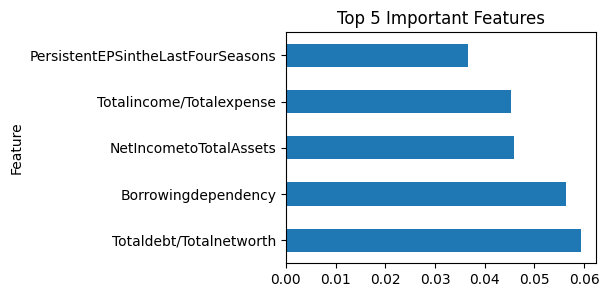

In [100]:
#bar plot of feature importance
plt.figure(figsize=(4,3))
plt.title("Top 5 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
feature_importance.plot(kind="barh")

